### EDA
The Notebook gives an EDA of the dataset provided. We are looking at the transactions provided in the dataset and hightlight any issues in the data.

In [1]:
###Importing Libraries required
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
###Path for the url at which the data is saved
csv_url = "https://raw.githubusercontent.com/rohithmadupu/DevoTeam_Assignment/main/ecommerce_data.csv"

In [3]:
###reading the csv and displaying head
df_ecomm = pd.read_csv(csv_url)
df_ecomm.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id
0,2010-12-09 15:43:00,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1.0,2010-12-09 15:43:00,2.95,15329.0,United Kingdom,20
1,2011-12-09 09:07:00,581480,23355,HOT WATER BOTTLE KEEP CALM,12.0,2011-12-09 09:07:00,4.95,14441.0,United Kingdom,20
2,2011-12-07 12:55:00,581132,NaN,NaN,4.0,2011-12-07 12:55:00,4.95,17590.0,United Kingdom,1
3,2011-06-23 14:11:00,557892,NaN,NaN,2.0,2011-06-23 14:11:00,6.35,14534.0,United Kingdom,17
4,2011-01-25 14:01:00,542115,84992,NaN,1.0,2011-01-25 14:01:00,2.08,NaN,United Kingdom,6


In [4]:
###Getting schema of the dataframe imported
df_ecomm.dtypes

InvoiceDate       object
InvoiceNo         object
StockCode         object
Description       object
Quantity         float64
InvoiceDate.1     object
UnitPrice        float64
CustomerID       float64
Country           object
Estore_id          int64
dtype: object

In [5]:
##Converting customer Id and estore ID to string
###for customerid  -> also removing .0 at the end
df_ecomm["CustomerID"] = df_ecomm["CustomerID"].astype("str")
df_ecomm["CustomerID"] = df_ecomm["CustomerID"].str.replace('.0', '')
df_ecomm["Estore_id"] = df_ecomm["Estore_id"].astype("str")

<ipython-input-5-09c73c345d9e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ecomm["CustomerID"] = df_ecomm["CustomerID"].str.replace('.0', '')


In [6]:
####Checking if both Invoice Dates match and then removing one
if (df_ecomm['InvoiceDate'].equals(df_ecomm['InvoiceDate.1']) == True):
    df_ecomm = df_ecomm.drop(["InvoiceDate.1"], axis = 1)


In [7]:
###creating a datefield and year field from Invoice Date
df_ecomm['Date'] = pd.to_datetime(df_ecomm.InvoiceDate,errors='coerce').dt.date

df_ecomm['Year'] = pd.to_datetime(df_ecomm.InvoiceDate,errors='coerce').dt.year


In [8]:
###Getting dimensions of the Dataframe
df_ecomm.shape

(130000, 11)

In [9]:
###Min and Max dates for which the data is available
f"Min and Max dates are {df_ecomm['Date'].min()} and {df_ecomm['Date'].max()}"

'Min and Max dates are 2010-12-01 and 2011-12-09'

In [10]:
###Count of nulls by Column
print(df_ecomm.isnull().sum(axis=0))   # Around 120k nulls in Stockcode,desc and quantity. No nulls in others

InvoiceDate         0
InvoiceNo           0
StockCode      123354
Description    126307
Quantity       119574
UnitPrice           0
CustomerID          0
Country             0
Estore_id           0
Date                0
Year                0
dtype: int64


In [11]:
###count of negative values in Quantity and Unit Price 
print(f"Negative Values in Quantity Column are {(df_ecomm['Quantity'] < 0).sum()}\n \
      Negative Values in UnitPrice Column are {(df_ecomm['UnitPrice'] < 0).sum()}")

####No nulls in unit price

Negative Values in Quantity Column are 943
       Negative Values in UnitPrice Column are 0


In [12]:
#### Getting number of transactions by Date
df_ecomm_cnt = pd.DataFrame(df_ecomm.groupby('Date').size().rename('Count').reset_index())
df_ecomm_cnt.sort_values(by=['Count'], ascending=False)
#--most transactions on 2011-October-6th and least on 2011-Feb-06

,Date,Count
249,2011-10-06,2174
125,2011-05-12,1791
275,2011-11-06,1762
248,2011-10-05,1520
286,2011-11-18,1507
...,...,...
233,2011-09-18,14
60,2011-02-20,13
30,2011-01-16,12
174,2011-07-10,11


In [13]:
###Unique values by column excluding Nans

df_ecomm.dropna().nunique()

InvoiceDate    1907
InvoiceNo      1920
StockCode      1168
Description    1184
Quantity         70
UnitPrice       123
CustomerID      968
Country           7
Estore_id        32
Date            302
Year              2
dtype: int64

<AxesSubplot:xlabel='Date', ylabel='Count'>

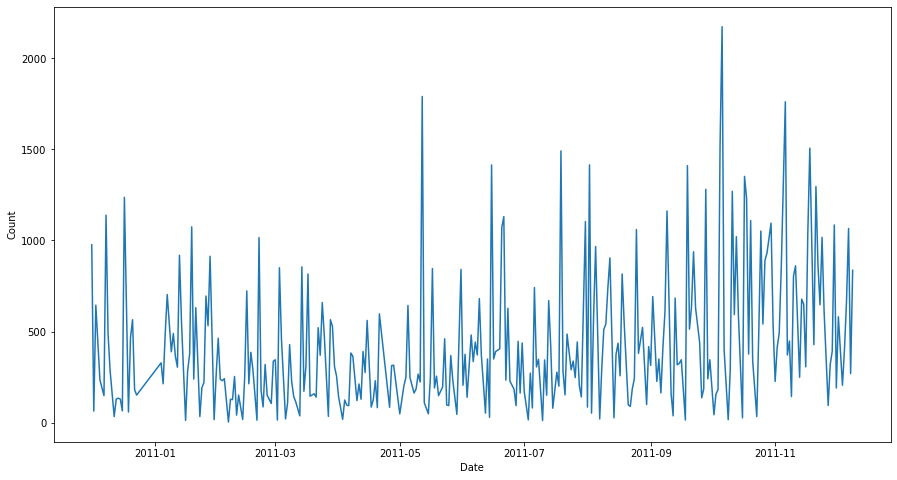

In [14]:
### Line plot - Count of transactions by Date
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Count',data = df_ecomm_cnt)

<AxesSubplot:xlabel='Year', ylabel='Count'>

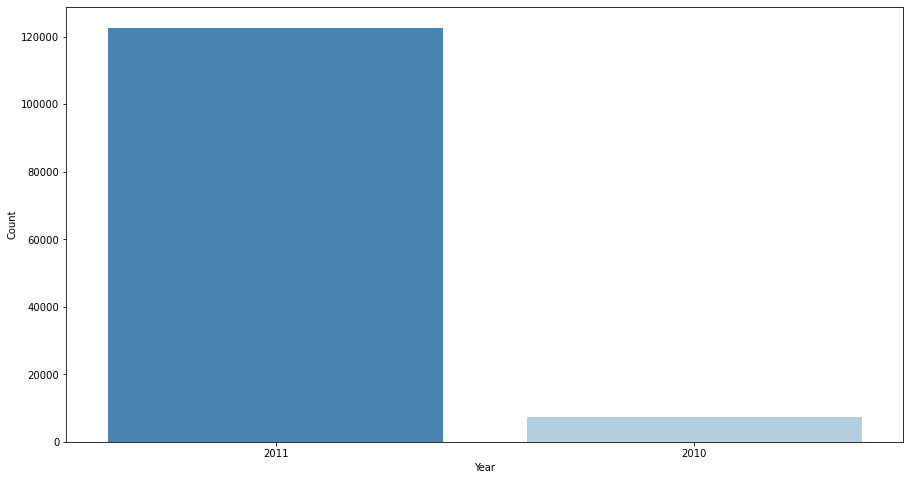

In [15]:
###Number of Transactions by Year
df_yr_cnt = df_ecomm.groupby(['Year']).size().rename('Count').reset_index()

plt.figure(figsize = (15,8))

(
    sns.barplot(x = 'Year',
                y = 'Count',
                data = df_yr_cnt,
                order = df_yr_cnt.sort_values("Count",ascending = False).Year,
                palette = "Blues_r")
)

<AxesSubplot:xlabel='Estore_id', ylabel='Count'>

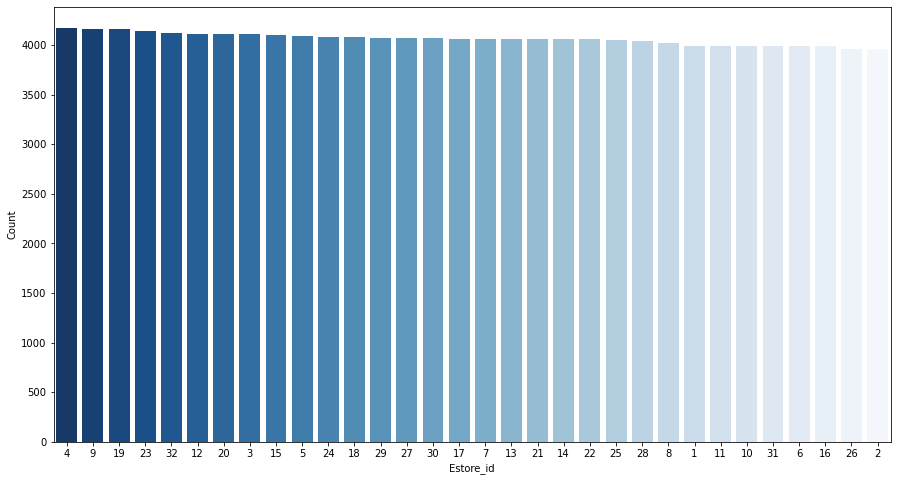

In [16]:
###Number of transactions by Store 
df_store_cnt = df_ecomm.groupby(['Estore_id']).size().rename('Count').reset_index()
plt.figure(figsize = (15,8))

(
    sns.barplot(x = 'Estore_id',
                y = 'Count',
                data = df_store_cnt,
                order = df_store_cnt.sort_values("Count",ascending = False).Estore_id,
                palette = "Blues_r")
)

<AxesSubplot:xlabel='CustomerID', ylabel='Count'>

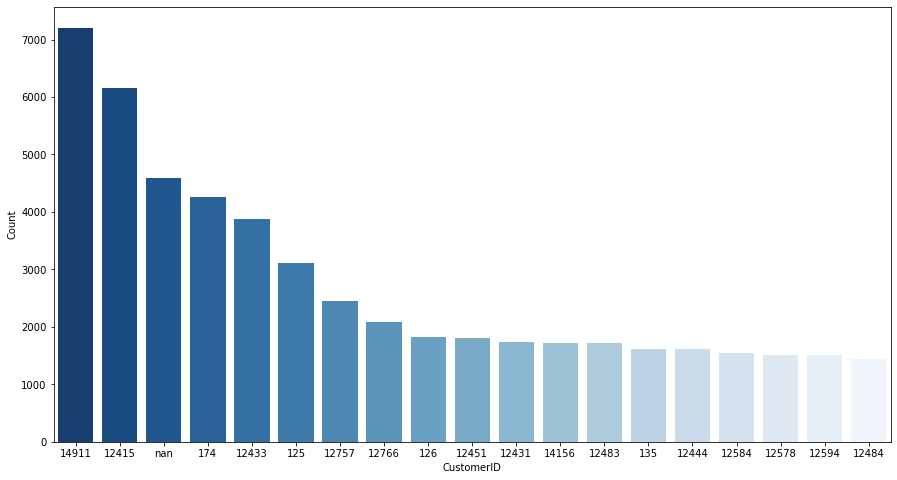

In [17]:
###Number of transactions by Customer ID 
df_cust_cnt = df_ecomm.groupby(['CustomerID']).size().rename('Count').reset_index()
plt.figure(figsize = (15,8))

(
    sns.barplot(x = 'CustomerID',
                y = 'Count',
                data = df_cust_cnt,
                order = df_cust_cnt.sort_values("Count",ascending = False).CustomerID[1:20],
                palette = "Blues_r")
)

<AxesSubplot:xlabel='InvoiceNo', ylabel='Count'>

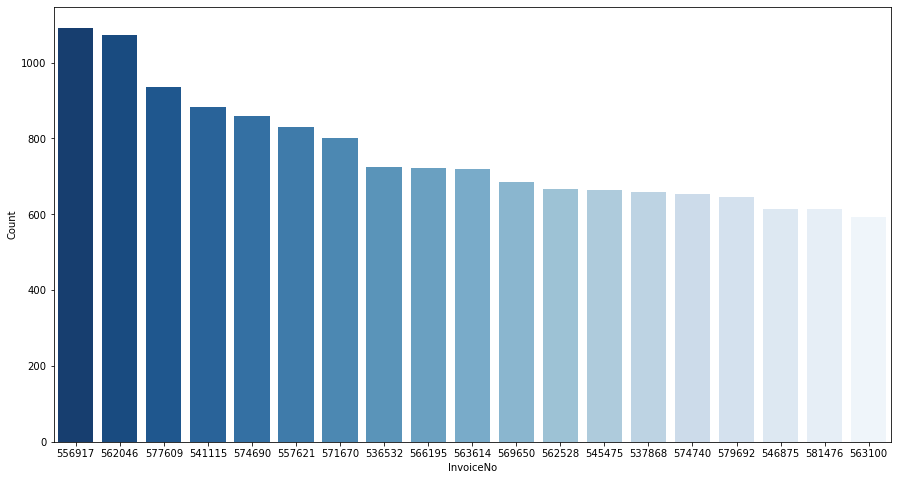

In [18]:
###Number of transactions by Invoice number
df_inv_cnt = df_ecomm.groupby(['InvoiceNo']).size().rename('Count').reset_index()
plt.figure(figsize = (15,8))

(
    sns.barplot(x = 'InvoiceNo',
                y = 'Count',
                data = df_inv_cnt,
                order = df_inv_cnt.sort_values("Count",ascending = False).InvoiceNo[1:20],
                palette = "Blues_r")
)

<AxesSubplot:xlabel='Country', ylabel='Count'>

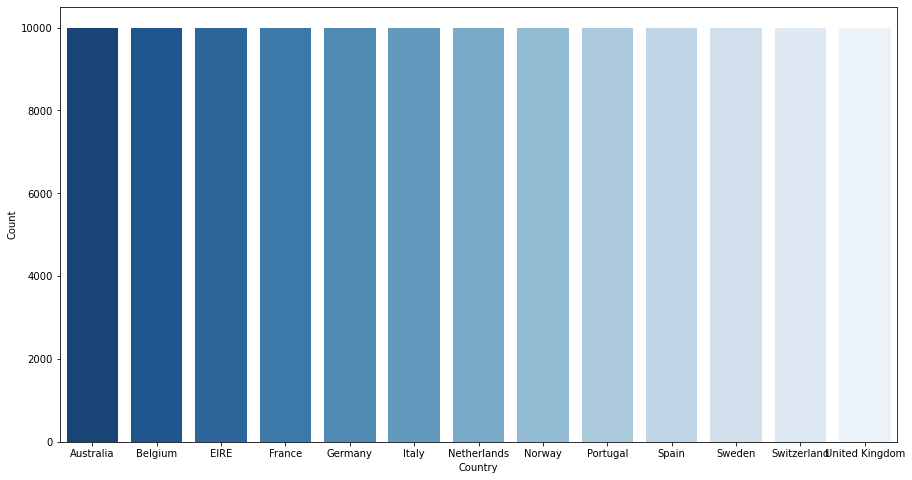

In [19]:
###Number of transactions by Country
df_cntry_cnt = df_ecomm.groupby(['Country']).size().rename('Count').reset_index()
plt.figure(figsize = (15,8))

(
    sns.barplot(x = 'Country',
                y = 'Count',
                data = df_cntry_cnt,
                order = df_cntry_cnt.sort_values("Count",ascending = False).Country,
                palette = "Blues_r")
)


<AxesSubplot:xlabel='StockCode', ylabel='Count'>

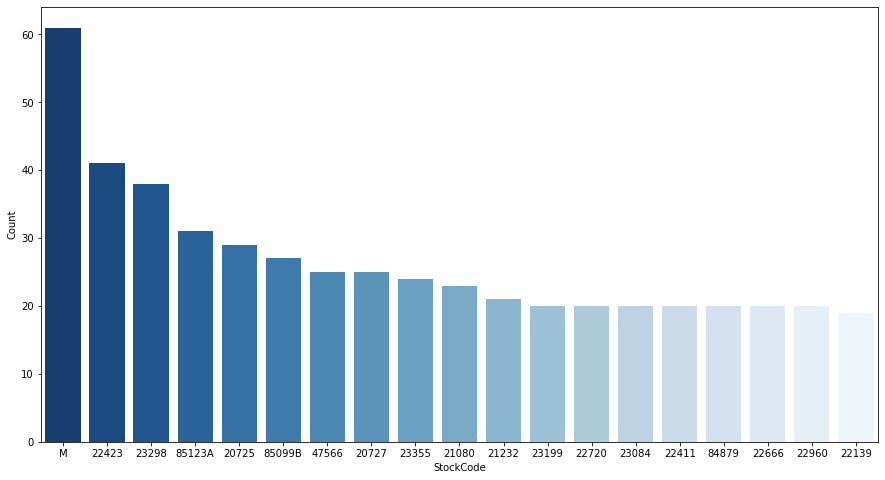

In [20]:
###Number of transactions by StockCode
df_stock_cnt = df_ecomm.groupby(['StockCode']).size().rename('Count').reset_index()
plt.figure(figsize = (15,8))

(
    sns.barplot(x = 'StockCode',
                y = 'Count',
                data = df_stock_cnt,
                order = df_stock_cnt.sort_values("Count",ascending = False).StockCode[1:20],
                palette = "Blues_r")
)

<AxesSubplot:xlabel='Date', ylabel='Count'>

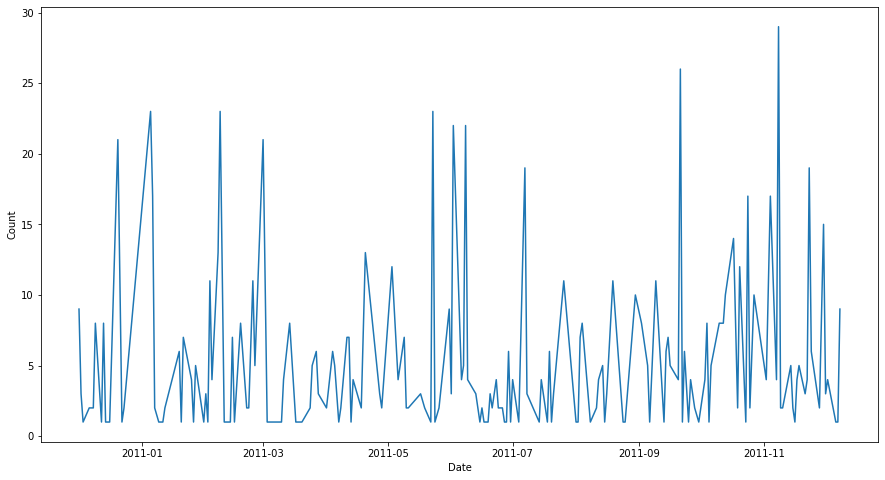

In [21]:
###negative values by Date
df_ecomm_cnt_neg = pd.DataFrame(df_ecomm[(df_ecomm['Quantity'] < 0)].groupby('Date').size().rename('Count').reset_index())

plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Count',data = df_ecomm_cnt_neg)